In [1]:
from scipy import stats
from scipy import optimize

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(style="whitegrid")#设置画图空间为指定风格

In [10]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])#创建数组

In [11]:
np.mean(x)#平均值

3.1

In [12]:
np.median(x)#中间值

3.0

In [13]:
 x.min(), x.max()#最小最大

(0.9, 6.7)

In [14]:
 x.var()#方差

3.0700000000000007

In [15]:
x.std()#标准差

1.7521415467935233

In [16]:
x.var(ddof=1)#自由度为1时的方差

3.5085714285714293

In [17]:
x.std(ddof=1)#自由度为1标准差

1.8731181032095732

In [18]:
np.random.rand()

0.253100588640375

In [19]:
np.random.randn()

-0.28692785511392993

In [20]:
 np.random.rand(5)

array([0.4359045 , 0.48155429, 0.79782286, 0.23023972, 0.65582622])

In [21]:
np.random.randn(2, 4)

array([[ 0.2099694 ,  0.87323126,  0.23021839, -1.08024915],
       [-0.36062082, -0.78889299, -0.65217698,  0.87099408]])

In [22]:
 np.random.randint(10, size=10)

array([9, 2, 6, 6, 6, 5, 3, 8, 5, 7])

In [23]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[16, 11, 10, 15, 17, 17, 12, 11, 14, 10],
       [14, 17, 15, 17, 16, 14, 12, 12, 15, 11]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

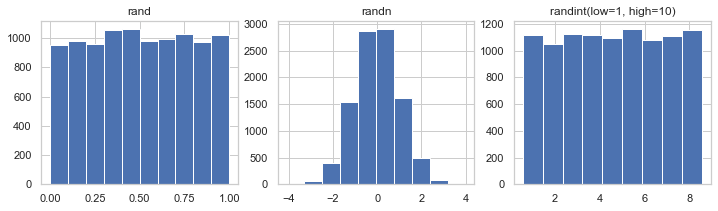

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [25]:
np.random.choice(10, 5, replace=False)

array([7, 5, 9, 1, 4])

In [26]:
np.random.seed(123456789)#设置相同的seed，则每次生成的随机数也相同

In [27]:
np.random.rand()

0.532833024789759

In [28]:
 np.random.seed(123456789); np.random.rand()

0.532833024789759

In [29]:
prng = np.random.RandomState(123456789)

In [30]:
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [31]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [32]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [33]:
 prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [34]:
 prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [35]:
 prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

In [36]:
X = stats.norm(1, 0.5)

In [37]:
X.mean()

1.0

In [38]:
X.median()

1.0

In [39]:
 X.std()

0.5

In [40]:
 X.var()

0.25

In [41]:
 [X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [42]:
X.stats()

(array(1.), array(0.25))

In [43]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [44]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [45]:
 X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [46]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [50]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random 
variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
 # discrete random variables do not have a pdf method, instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")

    for ax in axes:
        ax.legend()

Text(0, 0.5, 'Poisson dist.')

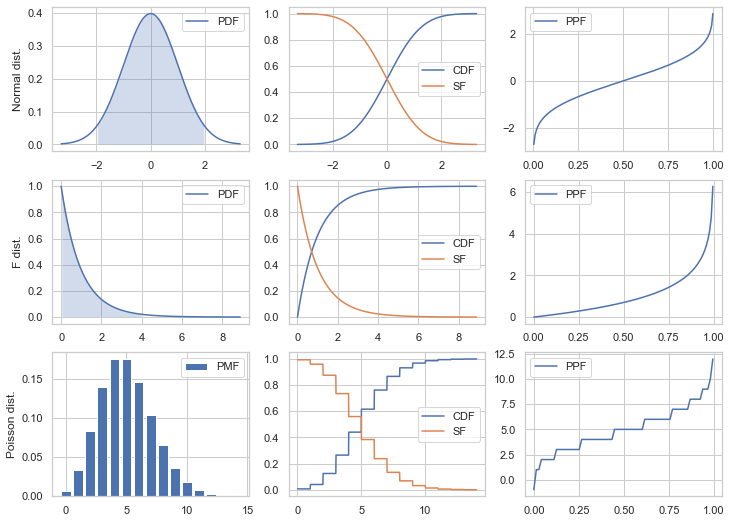

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [52]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [53]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [54]:
 X = stats.norm(1, 0.5)

In [55]:
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [56]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous 
random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)
    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    if title:
        ax.set_title(title)
    return ax

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


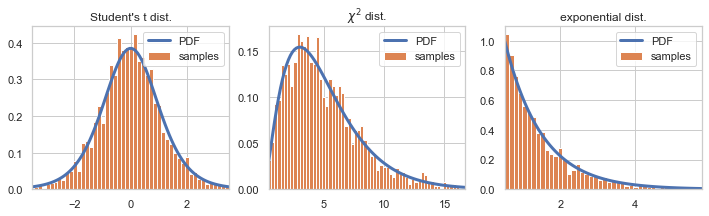

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
 # The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [58]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

In [59]:
 Y = stats.chi2(df=df, loc=loc, scale=scale)

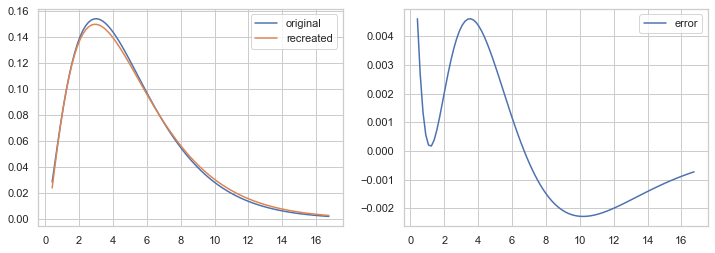

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)
axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()
axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

In [4]:
from scipy import stats
from scipy import optimize

In [5]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)
#rvs:对随机变量进行随机取值
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.041311437725705

In [21]:
n = 100
X_samples = X.rvs(n)#对随机变量进行随机取值，可以通过size参数指定输出的数组的大小。
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-3.416895778986242

In [22]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-2.9948773286106243

In [23]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [24]:
2 * stats.norm().cdf(-abs(z))

0.0006333952257096244

In [25]:
 2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0034684747477689336

In [26]:
 t, p = stats.ttest_1samp(X_samples, mu)

In [27]:
t

0.5110854192483966

In [28]:
p

0.6104291683631139

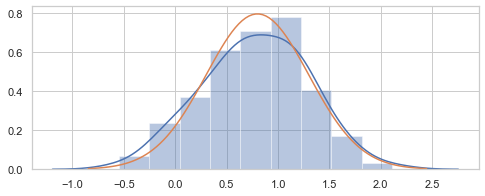

In [30]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [31]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [32]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [33]:
t

3.6024551045570545

In [34]:
p

0.0004972194842217

In [26]:
mu1, mu2

(0.8937003995448534, 0.6151166451387294)

In [27]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

In [28]:
kde = stats.kde.gaussian_kde(X_samples)

In [30]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


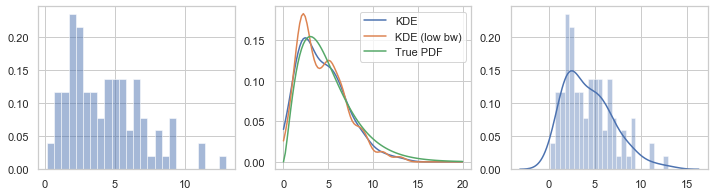

In [31]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [32]:
kde.resample(10)

array([[3.48359817, 6.57836115, 1.49555166, 4.71986733, 3.33425227,
        2.56252025, 3.11728259, 2.8782778 , 0.47885105, 2.07595983]])

In [33]:
def _kde_cdf(x):
        return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [34]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.
    dataset.mean(), args=(q,))[0]

In [35]:
kde_ppf = np.vectorize(_kde_ppf)

In [36]:
 kde_ppf([0.05, 0.95])

array([0.4490157 , 9.47811535])